                                                    
                                                    Heart_Disease_Analysis

In [1]:
# importing required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# reading the dataset
data=pd.read_csv("D:/Praachi/Python/Assignments/EDA_Proj_HeartAnalysis/heart_disease_dataset.csv")
#data=pd.read_csv("heart_disease_dataset.csv")

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  num       303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.shape

(303, 14)

# Number of columns is 14 and  number of rows is 303

In [6]:
# age- numerical data
#sex-  categorical
# cp(chest pain)angina- categorical data(Angina is a type of chest pain caused by reduced blood flow to the heart. )
        #1: Typical angina: chest pain related decrease blood supply to the heart
        #2: Atypical angina: chest pain not related to heart
        #3: Non-anginal pain: typically esophageal spasms (non heart related)
        #4: Asymptomatic: chest pain not showing signs of disease
# trestbps(resting blood sugar)- numerical data
# chol(cholestrol)-numerical data
# fbs(fasting blood sugar)- bool
#restecg(Resting electrocardiographic measurement)- categorical data
        #0: Nothing to note
        #1: ST-T Wave abnormality
            #can range from mild symptoms to severe problem - signals non-normal heart beat
        #2: Possible or definite left ventricular hypertrophy - Enlarged heart's main pumping chamber
#thalach(The person's maximum heart rate achieved)- numerical data
#exang(Exercise induced angina,occur due to exercise or heavy workout)- bool
#oldpeak(ST depression)- numerical
#slope- categorical data - the slope of the peak exercise ST segment
       #1: Upsloping: better heart rate with excercise (uncommon)
       #2: Flatsloping: minimal change (typical healthy heart)
       #3: Downslopins: signs of unhealthy heart
#ca(The number of major vessels (0-3))- numerical data - number of major vessels (0-3) colored by flourosopy
       #colored vessel means the doctor can see the blood passing through
       #the more blood movement the better (no clots)
#thal(A blood disorder called thalassemia)- categorical data
       #1,3: normal
       #6: fixed defect: used to be defect but ok now
       #7: reversable defect: no proper blood movement when excercising
#num(target)-bool

# 6 numerical variables , 3 bool, 5 categorical data
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_sugar', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

data.columns


Index(['age', 'sex', 'chest_pain_type', 'resting_blood_sugar', 'cholesterol',
       'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

In [7]:
pd.set_option('display.max_columns',None)

In [8]:
pd.set_option('display.max_rows',None)

In [9]:
# converting int to bool datatype as it takes less memory
data['exercise_induced_angina']=data.exercise_induced_angina.astype(bool)
data['fasting_blood_sugar']=data['fasting_blood_sugar'].astype(bool)
data['target']=data.target.astype(bool)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_sugar      303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    bool   
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    bool   
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    bool   
dtypes: bool(3), float64(1), in

In [11]:
# finding out the missing values

data.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_sugar        0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

In [12]:

missing_values=pd.DataFrame(data.isnull().sum()*100/data.shape[0]).reset_index()
missing_values

,index,0
0,age,0.0
1,sex,0.0
2,chest_pain_type,0.0
3,resting_blood_sugar,0.0
4,cholesterol,0.0
5,fasting_blood_sugar,0.0
6,rest_ecg,0.0
7,max_heart_rate_achieved,0.0
8,exercise_induced_angina,0.0
9,st_depression,0.0


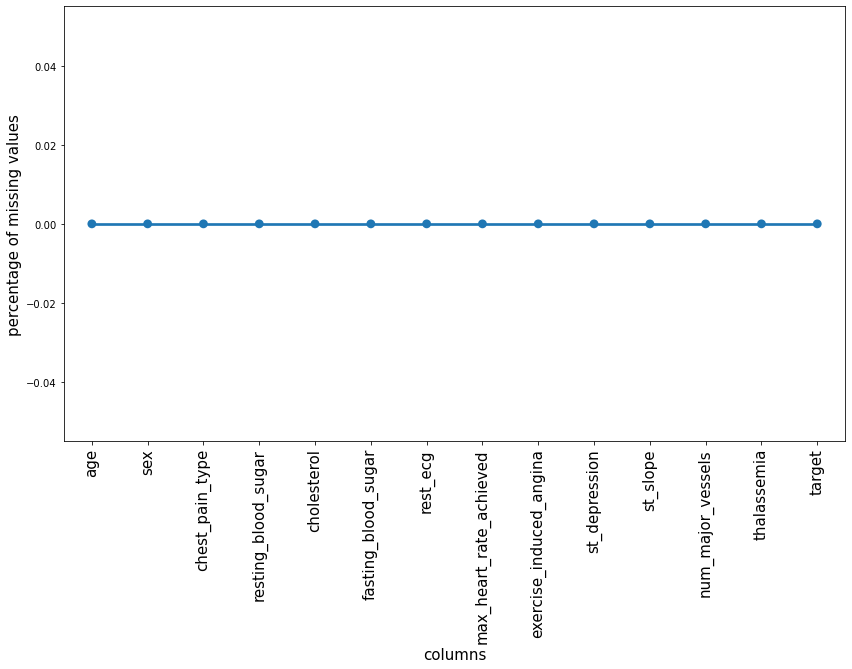

In [13]:
# visualizing null values if it exists
plt.figure(figsize=(14,8))
ax=sns.pointplot(x="index",y=0,data=missing_values)
plt.xticks(rotation=90, fontsize=15)
plt.xlabel("columns",fontsize=15)
plt.ylabel("percentage of missing values",fontsize=15)
plt.show()

# Data Profiling

In [14]:
data['age'].describe()

count    303.000000
mean      54.438944
std        9.038662
min       29.000000
25%       48.000000
50%       56.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

<AxesSubplot:>

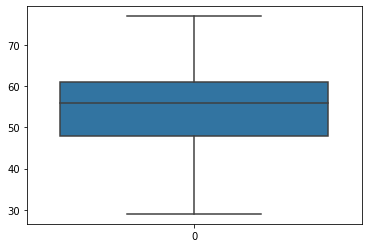

In [15]:
sns.boxplot(data=data['age'])

# no outliers in age column

In [16]:
data['age'].value_counts().count()

41

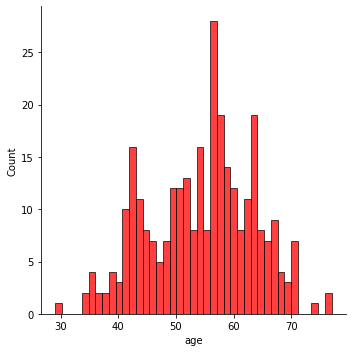

In [17]:

sns.displot(data['age'],bins=41,color="red", kde=False)

In [18]:
data['sex'].describe()

count    303.000000
mean       0.679868
std        0.467299
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: sex, dtype: float64

In [19]:
data['sex'].value_counts()

1    206
0     97
Name: sex, dtype: int64

Text(0, 0.5, 'gender')

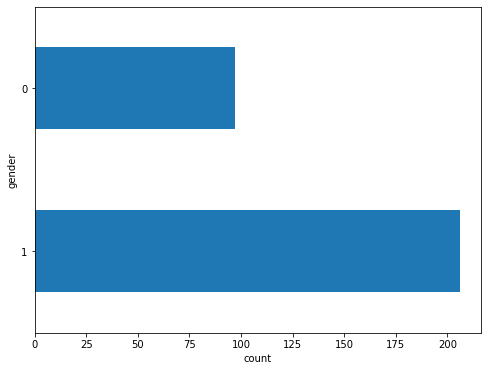

In [20]:
data['sex'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("count")
plt.ylabel("gender")

In [21]:
data['chest_pain_type'].describe()

count    303.000000
mean       3.158416
std        0.960126
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: chest_pain_type, dtype: float64

In [22]:
data['chest_pain_type'].value_counts()

4    144
3     86
2     50
1     23
Name: chest_pain_type, dtype: int64

Text(0, 0.5, '1:typical angina,2:atypical angina,3:non-anginal pain,4:asymptomatic')

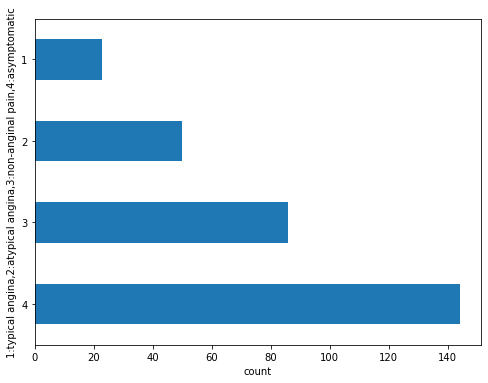

In [23]:
data['chest_pain_type'].value_counts().plot(kind='barh',figsize=(8,6))
plt.xlabel("count")
plt.ylabel("1:typical angina,2:atypical angina,3:non-anginal pain,4:asymptomatic")

In [24]:
data['resting_blood_sugar'].describe()

count    303.000000
mean     131.689769
std       17.599748
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: resting_blood_sugar, dtype: float64

<AxesSubplot:>

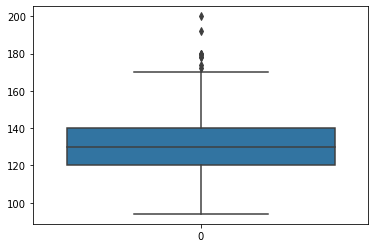

In [25]:
sns.boxplot(data=data['resting_blood_sugar'])

# Outliers found in resting_blood_sugar column

In [26]:
data['resting_blood_sugar'].value_counts().count()

50

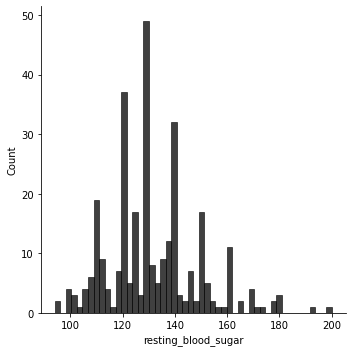

In [27]:
sns.displot(data['resting_blood_sugar'],bins=50,color="black", kde=False,)

In [28]:
data['cholesterol'].describe()

count    303.000000
mean     246.693069
std       51.776918
min      126.000000
25%      211.000000
50%      241.000000
75%      275.000000
max      564.000000
Name: cholesterol, dtype: float64

<AxesSubplot:>

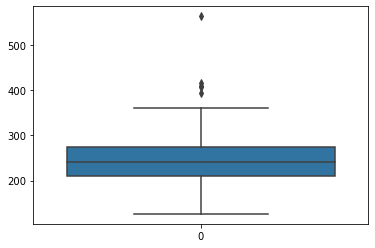

In [29]:
sns.boxplot(data=data['cholesterol'])

# Outliers in cholesterol column

In [30]:
data['cholesterol'].value_counts().count()

152

In [31]:
data['cholesterol'].max()

564

In [32]:
data['cholesterol'].min()

126

In [33]:
data['cholesterol'].min()

126

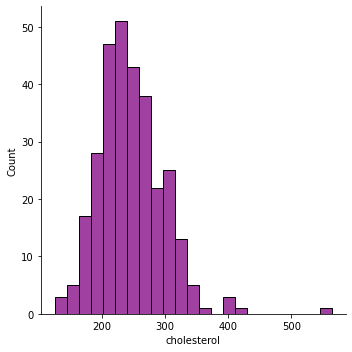

In [34]:
sns.displot(data['cholesterol'],color="purple")

In [35]:
data['fasting_blood_sugar'].describe()

count       303
unique        2
top       False
freq        258
Name: fasting_blood_sugar, dtype: object

In [36]:
data['fasting_blood_sugar'].value_counts()

False    258
True      45
Name: fasting_blood_sugar, dtype: int64

Text(0, 0.5, '> 120 mg/dl: true, <120 mg/dl:false')

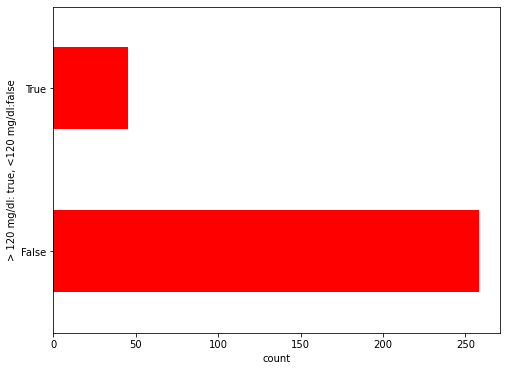

In [37]:
data['fasting_blood_sugar'].value_counts().plot(kind='barh', figsize=(8,6), color="red")
plt.xlabel("count")
plt.ylabel("> 120 mg/dl: true, <120 mg/dl:false")

In [38]:
data['rest_ecg'].describe()

count    303.000000
mean       0.990099
std        0.994971
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: rest_ecg, dtype: float64

In [39]:
data['rest_ecg'].value_counts()

0    151
2    148
1      4
Name: rest_ecg, dtype: int64

Text(0, 0.5, '0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy')

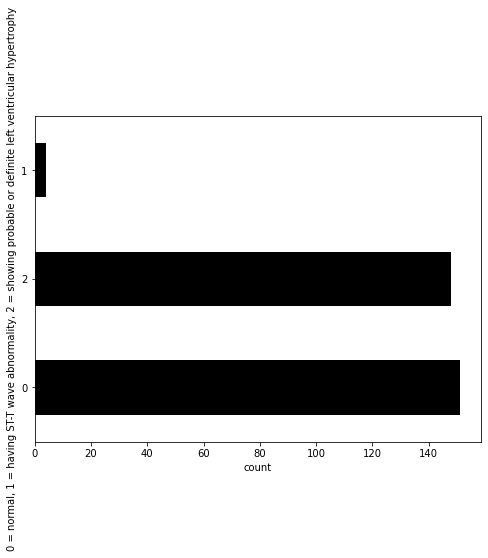

In [40]:
data['rest_ecg'].value_counts().plot(kind="barh",figsize=(8,6),color="black")
plt.xlabel("count")
plt.ylabel("0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy")

In [41]:
data["max_heart_rate_achieved"].describe()

count    303.000000
mean     149.607261
std       22.875003
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: max_heart_rate_achieved, dtype: float64

<AxesSubplot:>

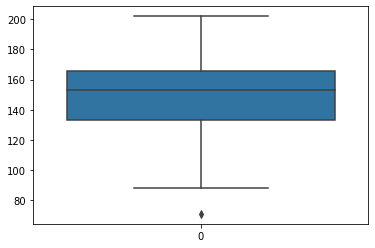

In [42]:
sns.boxplot(data=data["max_heart_rate_achieved"])

# There are few outliers in max_heart_rate_achieved

In [43]:
data["max_heart_rate_achieved"].value_counts().count()

91

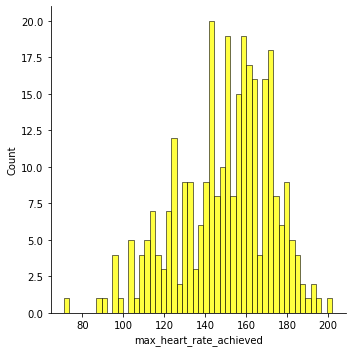

In [44]:
sns.displot(data["max_heart_rate_achieved"], color="yellow",bins=50)

In [45]:
data['exercise_induced_angina'].describe()

count       303
unique        2
top       False
freq        204
Name: exercise_induced_angina, dtype: object

In [46]:
data['exercise_induced_angina'].value_counts()

False    204
True      99
Name: exercise_induced_angina, dtype: int64

Text(0, 0.5, '1 = yes; 0 = no')

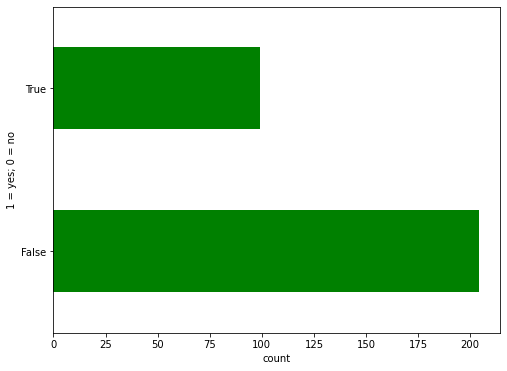

In [47]:
data['exercise_induced_angina'].value_counts().plot(kind="barh",figsize=(8,6),color="green")
plt.xlabel("count")
plt.ylabel("1 = yes; 0 = no")

In [48]:
data['st_depression'].describe()

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: st_depression, dtype: float64

<AxesSubplot:>

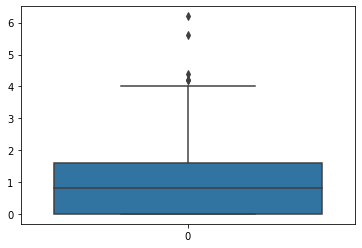

In [49]:
sns.boxplot(data=data['st_depression'])

# Outliers found in st_depression column

In [50]:
data['st_depression'].value_counts().count()

40

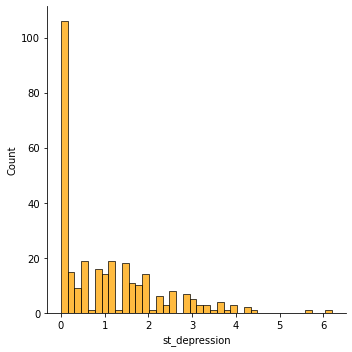

In [51]:
sns.displot(data['st_depression'],bins=40,color="orange")

In [52]:
data["st_slope"].describe()

count    303.000000
mean       1.600660
std        0.616226
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: st_slope, dtype: float64

In [53]:
data["st_slope"].all()

True

Text(0, 0.5, '1:upsloping, 2:flat, 3:downsloping')

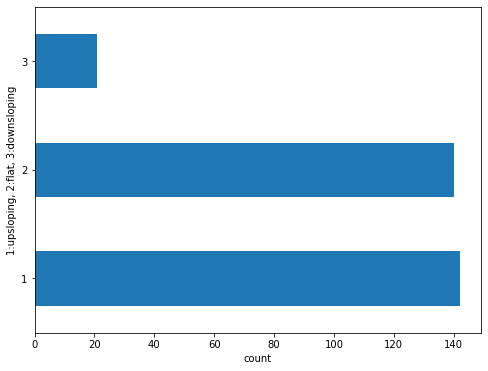

In [54]:
data['st_slope'].value_counts().plot(kind="barh",figsize=(8,6))
plt.xlabel("count")
plt.ylabel("1:upsloping, 2:flat, 3:downsloping")

In [55]:
data['num_major_vessels'].describe()

count       303.000000
mean      -1319.468647
std       11432.566205
min     -100000.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           3.000000
Name: num_major_vessels, dtype: float64

<AxesSubplot:>

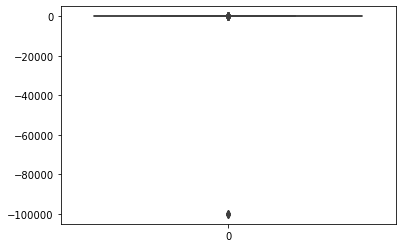

In [56]:
sns.boxplot(data=data['num_major_vessels'])

In [57]:
data['num_major_vessels'].value_counts()

 0         176
 1          65
 2          38
 3          20
-100000      4
Name: num_major_vessels, dtype: int64

In [58]:
data['num_major_vessels'].value_counts().count()

5

In [59]:
data['num_major_vessels']=abs(data['num_major_vessels'])

In [60]:
data['num_major_vessels'].min()

0

In [61]:
data['num_major_vessels'].max()

100000

In [62]:
data['num_major_vessels'].value_counts()

0         176
1          65
2          38
3          20
100000      4
Name: num_major_vessels, dtype: int64

In [63]:
data['num_major_vessels'].describe()

count       303.000000
mean       1320.795380
std       11432.412498
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max      100000.000000
Name: num_major_vessels, dtype: float64

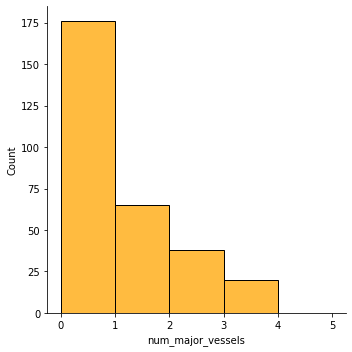

In [64]:
sns.displot(data['num_major_vessels'],bins=[0,1,2,3,4,5],color="orange")

In [65]:
data['thalassemia'].describe()

count       303.000000
mean       -655.363036
std        8111.366638
min     -100000.000000
25%           3.000000
50%           3.000000
75%           7.000000
max           7.000000
Name: thalassemia, dtype: float64

In [66]:
data['thalassemia']=abs(data['thalassemia'])

<AxesSubplot:>

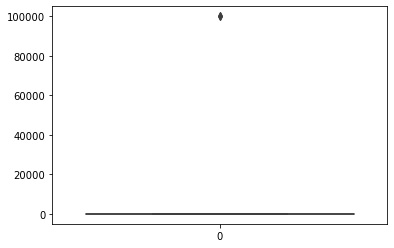

In [67]:
sns.boxplot(data=data['thalassemia'])

In [68]:
data['thalassemia'].value_counts()

3         166
7         117
6          18
100000      2
Name: thalassemia, dtype: int64

Text(0, 0.5, '3 = normal; 6 = fixed defect; 7 = reversable defect')

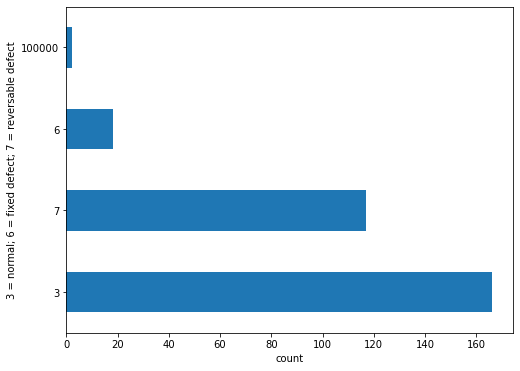

In [69]:
data['thalassemia'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("count")
plt.ylabel("3 = normal; 6 = fixed defect; 7 = reversable defect")

In [70]:
data['target'].describe()

count       303
unique        2
top       False
freq        164
Name: target, dtype: object

In [71]:
data['target'].value_counts()*100/len(data['target'])

False    54.125413
True     45.874587
Name: target, dtype: float64

Text(0, 0.5, '0 = no disease, 1 = disease')

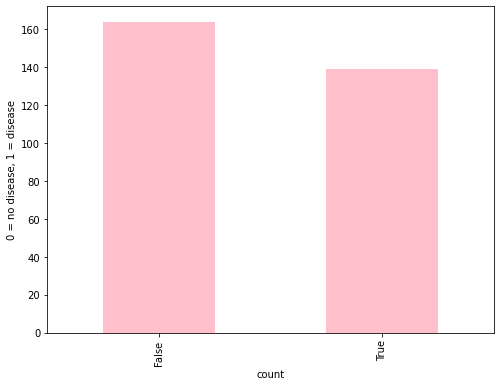

In [72]:
data['target'].value_counts().plot(kind='bar', figsize=(8, 6), color="pink")
plt.xlabel("count")
plt.ylabel("0 = no disease, 1 = disease")

# From the box plots we can see there are Outliers in st_depression, max_heart_rate_achieved, resting_blood_sugar and cholesterol in these variables. So lets drop the outlier value and replace the outlier using IQR.

In [73]:
#creating copy of data
data_copy = data.copy()

In [74]:
#Function to remove Outliers
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    low_rang = Q1 - (1.5 * IQR)
    upp_rang = Q3 + (1.5 * IQR)
    return low_rang, upp_rang

In [75]:
low_chol, upp_chol = remove_outlier(data_copy['cholesterol'])
low_chol
data_copy['cholesterol'] = np.where(data_copy['cholesterol']>upp_chol, upp_chol, data_copy['cholesterol'])
data_copy['cholesterol'] = np.where(data_copy['cholesterol']<low_chol, low_chol, data_copy['cholesterol'])

<AxesSubplot:xlabel='cholesterol'>

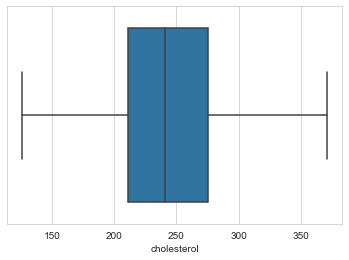

In [76]:
sns.set_style("whitegrid")
  
sns.boxplot(x = 'cholesterol', data = data_copy)

In [77]:
low_depr, upp_depr = remove_outlier(data_copy['st_depression'])
data_copy['st_depression'] = np.where(data_copy['st_depression']>upp_depr, upp_depr, data_copy['st_depression'])
data_copy['st_depression'] = np.where(data_copy['st_depression']<low_depr, low_depr, data_copy['st_depression'])

<AxesSubplot:xlabel='st_depression'>

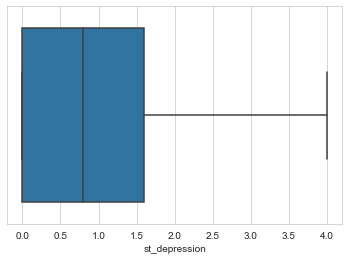

In [78]:
sns.set_style("whitegrid")
  
sns.boxplot(x = 'st_depression', data = data_copy)

In [79]:
low_hrate, upp_hrate = remove_outlier(data_copy['max_heart_rate_achieved'])
data_copy['max_heart_rate_achieved'] = np.where(data_copy['max_heart_rate_achieved']>upp_hrate, upp_hrate, data_copy['max_heart_rate_achieved'])
data_copy['max_heart_rate_achieved'] = np.where(data_copy['max_heart_rate_achieved']<low_hrate, low_hrate, data_copy['max_heart_rate_achieved'])

<AxesSubplot:xlabel='max_heart_rate_achieved'>

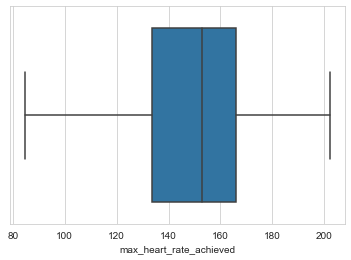

In [80]:
sns.set_style("whitegrid")
  
sns.boxplot(x = 'max_heart_rate_achieved', data = data_copy)

In [81]:
low_rbs, upp_rbs = remove_outlier(data_copy['resting_blood_sugar'])
data_copy['resting_blood_sugar'] = np.where(data_copy['resting_blood_sugar']>upp_rbs, upp_rbs, data_copy['resting_blood_sugar'])
data_copy['resting_blood_sugar'] = np.where(data_copy['resting_blood_sugar']<low_rbs, low_rbs, data_copy['resting_blood_sugar'])

<AxesSubplot:xlabel='resting_blood_sugar'>

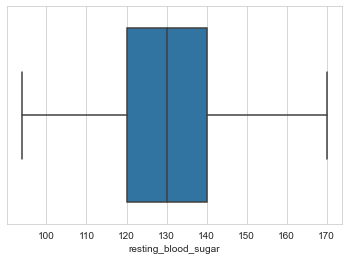

In [82]:
sns.set_style("whitegrid")
  
sns.boxplot(x = 'resting_blood_sugar', data = data_copy)

# Now we can see that Outliers are removed. Now lets perform the Analysis.

# UNIVARIATE ANALYSIS

<AxesSubplot:ylabel='target'>

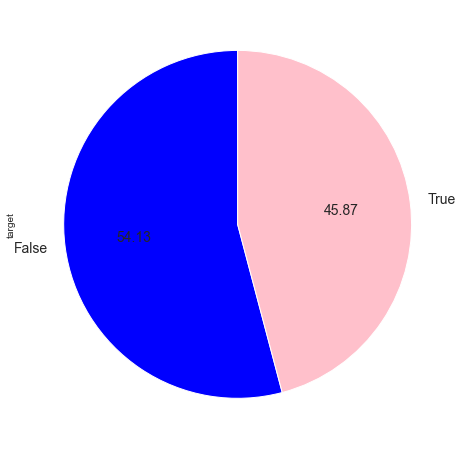

In [83]:
plt.figure(figsize=(8,8))
labels=[""]
data_copy['target'].value_counts().plot.pie(autopct="%.2f", colors=["blue","pink"], startangle=90,textprops={'fontsize': 14})


# 45.87% Of the patients detected with heart disease.

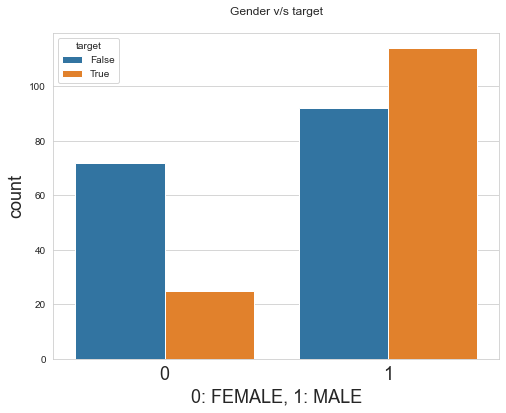

In [84]:
# DISTRIBUTION OF SEX ACCORDING TO TARGET
plt.figure(figsize=(8,6))
plt.xticks(rotation=0, fontsize=18)
sns.countplot(x=data_copy['sex'],hue='target',data=data_copy)
plt.xlabel("0: FEMALE, 1: MALE",fontsize=18)
plt.ylabel("count",fontsize=18)
plt.title('Gender v/s target\n')
plt.show()

# Males have higher chances of having heart disease than females.

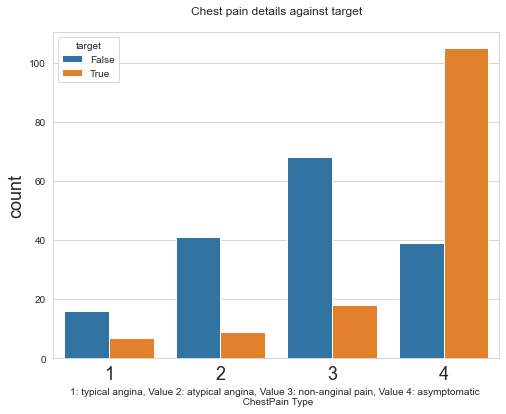

In [85]:
# distribution of chest pain type with respect to target
plt.figure(figsize=(8,6))
plt.xticks(rotation=0, fontsize=18)
sns.countplot(x=data_copy['chest_pain_type'],hue='target',data=data_copy)
#plt.xlabel("chest_pain_type",fontsize=18)
plt.xlabel("1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic \n ChestPain Type")
plt.ylabel("count",fontsize=18)
plt.title('Chest pain details against target\n')
plt.show()
#Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic

# Patients suffering from asymptomatic chest pain are more susseptible to have heart disease.

<AxesSubplot:xlabel='resting_blood_sugar', ylabel='Count'>

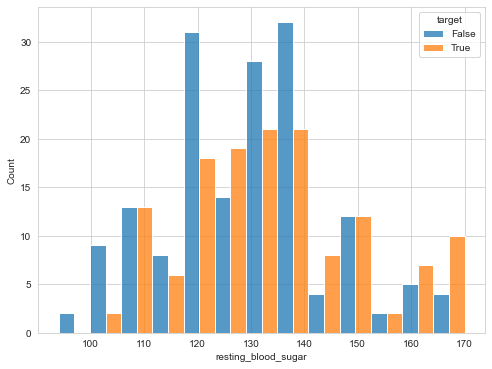

In [86]:
# Distribution of resting blood suger with respect to target
plt.figure(figsize=(8,6))
sns.histplot(data=data_copy,hue='target',x="resting_blood_sugar",multiple="dodge")

<AxesSubplot:ylabel='bins'>

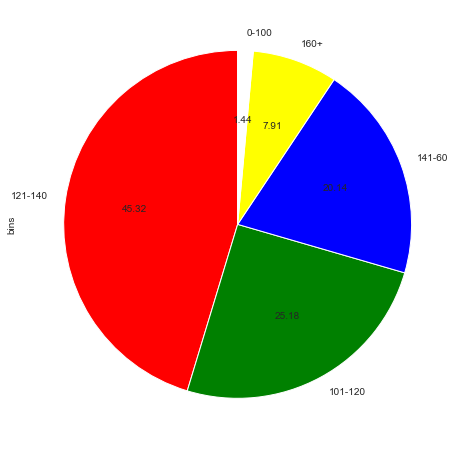

In [87]:
data_copy['bins'] = pd.cut(data_copy['resting_blood_sugar'],bins=[0,100,120,140,160,180], labels=["0-100","101-120","121-140","141-60","160+"])
plt.figure(figsize=(8,8))
data_copy[data_copy['target']==1]['bins'].value_counts().plot.pie(autopct="%.2f", colors=["red","green","blue","yellow","white"],startangle=90,fontsize=10)

# Patients having resting blood suger(diastolic state) in range 121-140mm Hg in diastolic state have higher chances of heart disease

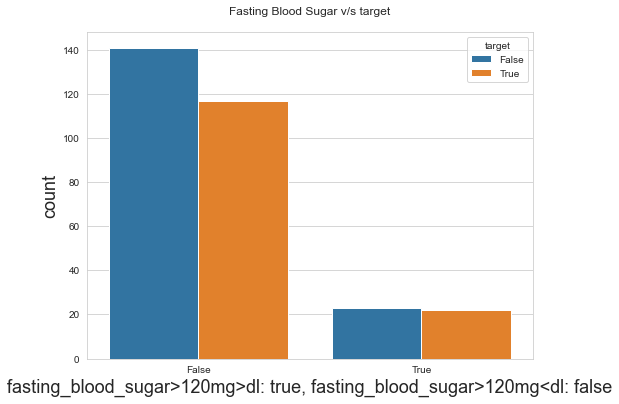

In [88]:
plt.figure(figsize=(8,6))
sns.countplot(data=data_copy,hue='target',x="fasting_blood_sugar")
plt.xlabel("fasting_blood_sugar>120mg>dl: true, fasting_blood_sugar>120mg<dl: false",fontsize=18)
plt.ylabel("count",fontsize=18)
plt.title('Fasting Blood Sugar v/s target\n')
plt.show()

<AxesSubplot:ylabel='bins'>

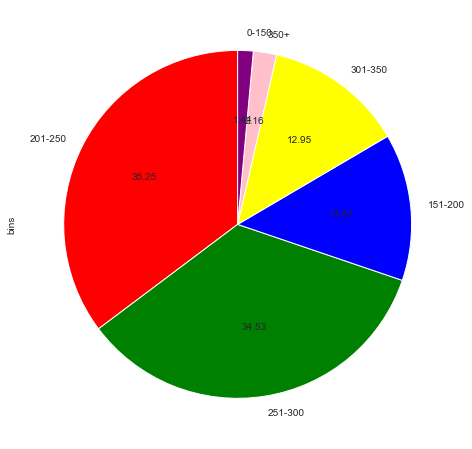

In [89]:
data_copy['bins'] = pd.cut(data_copy['cholesterol'],bins=[0,150,200,250,300,350,400], labels=["0-150","151-200","201-250","251-300","301-350","350+"])
plt.figure(figsize=(8,8))
data_copy[data_copy['target']==1]['bins'].value_counts().plot.pie(autopct="%.2f", colors=["red","green","blue","yellow","pink","purple"],startangle=90,fontsize=10)

# Patients having fasting blood suger >120 have higher chances of having heart disease.



Text(0.5, 1.0, 'Gender v/s target\n')

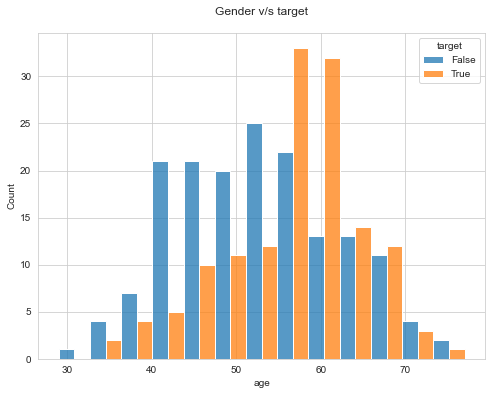

In [90]:
plt.figure(figsize=(8,6))
sns.histplot(data=data_copy,hue='target',x="age",multiple="dodge")
plt.title('Gender v/s target\n')

<AxesSubplot:ylabel='bins'>

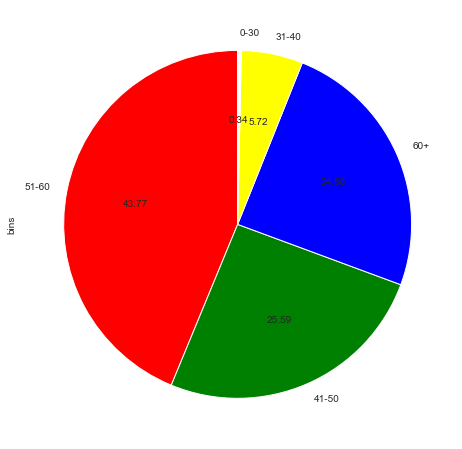

In [91]:
data_copy['bins'] = pd.cut(data_copy['age'],bins=[0,30,40,50,60,70], labels=["0-30","31-40","41-50","51-60","60+"])

plt.figure(figsize=(8,8))
data_copy['bins'].value_counts().plot.pie(autopct="%.2f", colors=["red","green","blue","yellow","white"],startangle=90)

# Peolpe between age 51-60 have higher chances of having heart disease.

<AxesSubplot:xlabel='cholesterol', ylabel='Count'>

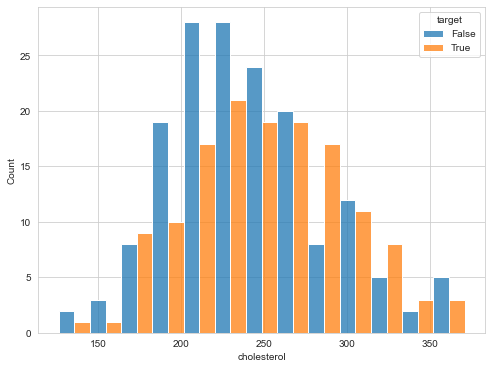

In [92]:
plt.figure(figsize=(8,6))
sns.histplot(data=data_copy,hue='target',x="cholesterol",multiple="dodge")

Text(0.0, 1.0, 'Cholestrol details against target\n')

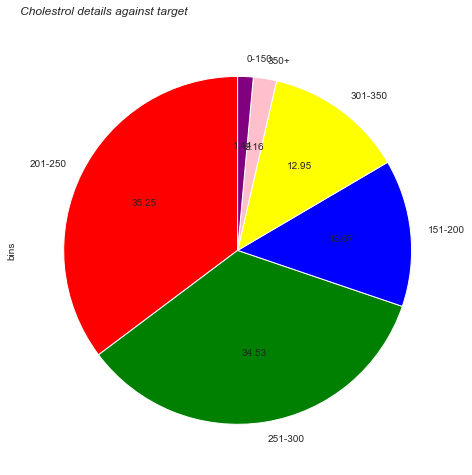

In [93]:
data_copy['bins'] = pd.cut(data_copy['cholesterol'],bins=[0,150,200,250,300,350,400], labels=["0-150","151-200","201-250","251-300","301-350","350+"])
plt.figure(figsize=(8,8))
data_copy[data_copy['target']==1]['bins'].value_counts().plot.pie(autopct="%.2f", colors=["red","green","blue","yellow","pink","purple"],startangle=90,fontsize=10)
plt.title(label="Cholestrol details against target\n",loc="left",fontstyle='italic')

# Patients having cholesterol level between 200 to 300 mg/dl have higher chances of having heart disease.

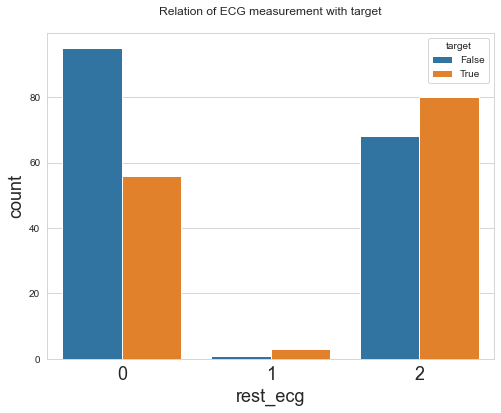

In [94]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=0, fontsize=18)
sns.countplot(x='rest_ecg',hue='target',data=data_copy)
plt.xlabel("rest_ecg",fontsize=18)
plt.ylabel("count",fontsize=18)
plt.title('Relation of ECG measurement with target\n')
plt.show()


# The above plot shows that the more number of patients not likely to suffer showing probable or definite left ventricular hypertrophy are more likelihood of suffering from a heart disease.

<AxesSubplot:xlabel='max_heart_rate_achieved', ylabel='Count'>

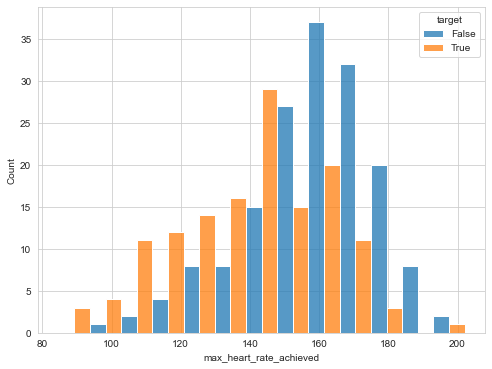

In [95]:
# Distribution of heart rate with respect to target
plt.figure(figsize=(8,6))
sns.histplot(x='max_heart_rate_achieved',hue='target',multiple='dodge',data=data_copy)

<AxesSubplot:ylabel='bins'>

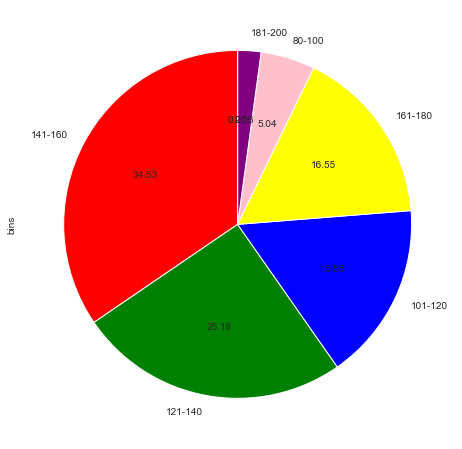

In [96]:
data_copy['bins'] = pd.cut(data_copy['max_heart_rate_achieved'],bins=[80,100,120,140,160,180,200,300], labels=["80-100","101-120","121-140","141-160","161-180","181-200","201+"])
plt.figure(figsize=(8,8))
data_copy[data_copy['target']==1]['bins'].value_counts().plot.pie(autopct="%.2f", colors=["red","green","blue","yellow","pink","purple","orange"],startangle=90,fontsize=10)

# People having heart rate between 140 to 160 are likely to suffer from heart disease.

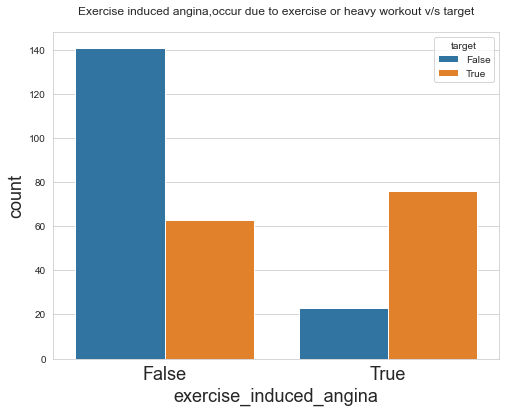

In [97]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=0, fontsize=18)
sns.countplot(x='exercise_induced_angina',data=data_copy, hue='target')
plt.xlabel("exercise_induced_angina",fontsize=18)
plt.ylabel("count",fontsize=18)
plt.title("Exercise induced angina,occur due to exercise or heavy workout v/s target\n")
plt.show()

#  EXERCISE INDUCED ANGINAL PAIN HAVE SLIGHTLY HIGHER CHANCES OF GETTING HEART DISEASE THAN WITHOUT EXERCISE INDUCED PAIN

<AxesSubplot:xlabel='st_depression', ylabel='Count'>

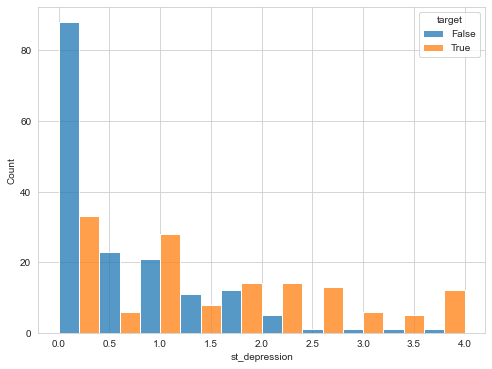

In [98]:

plt.figure(figsize=(8,6))
sns.histplot(x='st_depression',hue='target',multiple='dodge',data=data_copy)

Text(0.0, 1.0, 'ST depression details against target\n')

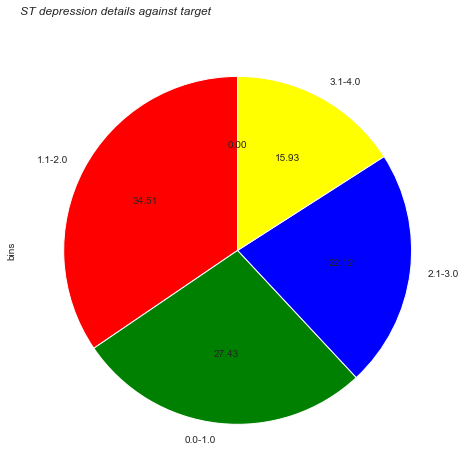

In [99]:
data_copy['bins'] = pd.cut(data_copy['st_depression'],bins=[0.0,1.0,2.0,3.0,4.0,5.0], labels=["0.0-1.0","1.1-2.0","2.1-3.0","3.1-4.0","4.1-5.0"])
plt.figure(figsize=(8,8))
data_copy[data_copy['target']==1]['bins'].value_counts().plot.pie(autopct="%.2f", colors=["red","green","blue","yellow","pink","purple"],startangle=90,fontsize=10)
plt.title(label="ST depression details against target\n",loc="left",fontstyle='italic')

# People having st depression induced by exercise relative to rest >0.5 mm have higher chances of heart disease.

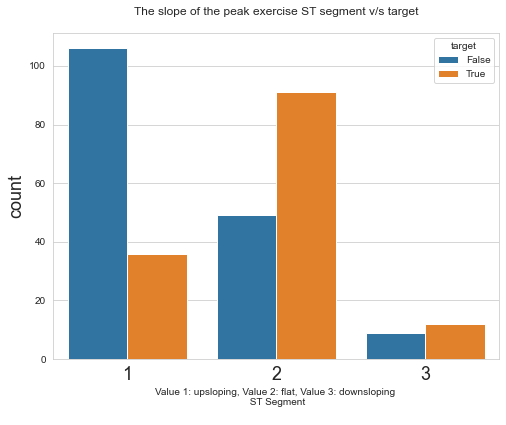

In [100]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=0, fontsize=18)
sns.countplot(x='st_slope',data=data_copy, hue='target')
#plt.xlabel("st_slope",fontsize=18)
plt.xlabel("Value 1: upsloping, Value 2: flat, Value 3: downsloping \n ST Segment\n")
plt.ylabel("count",fontsize=18)
plt.title("The slope of the peak exercise ST segment v/s target\n")
plt.show()

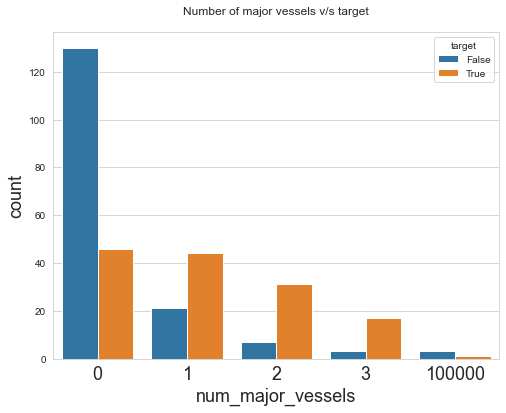

In [101]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=0, fontsize=18)
sns.countplot(x='num_major_vessels',data=data_copy, hue='target')
plt.xlabel("num_major_vessels",fontsize=18)
plt.ylabel("count",fontsize=18)
plt.title("Number of major vessels v/s target\n")
plt.show()

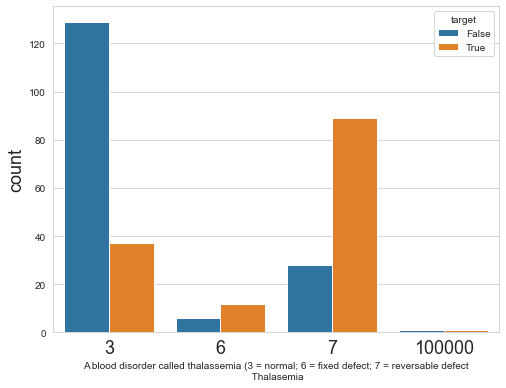

In [102]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=0, fontsize=18)
sns.countplot(x=data_copy['thalassemia'], hue='target', data=data_copy)
#plt.xlabel("thalasemia",fontsize=18)
plt.xlabel("A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect\n Thalasemia")
plt.ylabel("count",fontsize=18)
plt.show()

# Removing wrong data from variable thalassaemia and num_of_vessels.

In [103]:
thal1 = data_copy['thalassemia'].mode()
thal1

0    3
dtype: int64

In [104]:
ves1 = data_copy['num_major_vessels'].mode()
ves1

0    0
dtype: int64

In [105]:
data_copy['thalassemia'].max()

100000

In [106]:
data_copy['num_major_vessels'].max()

100000

In [107]:
#data_copy.loc[data_copy.thalassemia>100]=3
data_copy.loc[(data_copy.thalassemia > 100), 'thalassemia'] = data_copy['thalassemia'].mode()

In [108]:
data_copy['thalassemia'].value_counts()

3.0    166
7.0    117
6.0     18
Name: thalassemia, dtype: int64

In [109]:
data_copy['num_major_vessels'].value_counts()

0         176
1          65
2          38
3          20
100000      4
Name: num_major_vessels, dtype: int64

In [110]:
data_copy.loc[(data_copy.num_major_vessels > 100), 'num_major_vessels'] = data_copy['num_major_vessels'].mode()

In [111]:
data_copy['num_major_vessels'].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
Name: num_major_vessels, dtype: int64

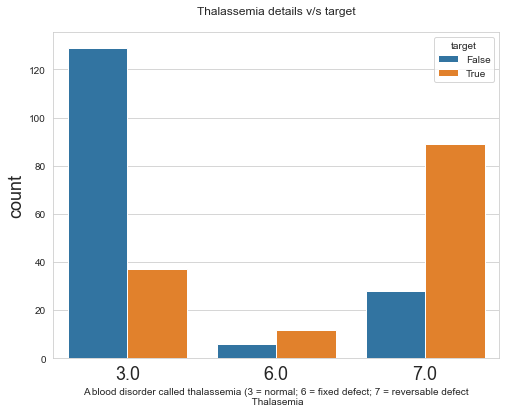

In [112]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=0, fontsize=18)
sns.countplot(x=data_copy['thalassemia'], hue='target', data=data_copy)
#plt.xlabel("thalasemia",fontsize=18)
plt.xlabel("A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect\n Thalasemia")
plt.ylabel("count",fontsize=18)
plt.title("Thalassemia details v/s target\n")
plt.show()

# People having reversable have higher chances of disease than people having and fixed defect thalassaemia.

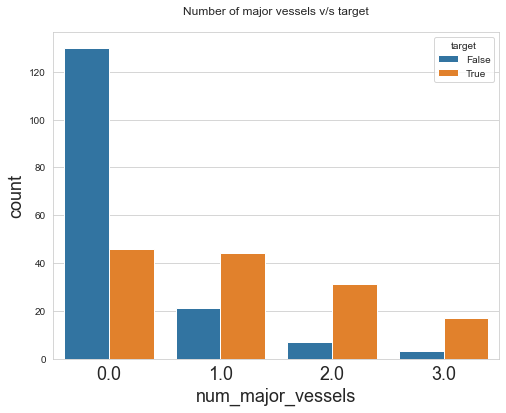

In [113]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=0, fontsize=18)
sns.countplot(x='num_major_vessels',data=data_copy, hue='target')
plt.xlabel("num_major_vessels",fontsize=18)
plt.ylabel("count",fontsize=18)
plt.title("Number of major vessels v/s target\n")
plt.show()

# BIVARIATE ANALYSIS

In [114]:
data_copy.corr()

,age,sex,chest_pain_type,resting_blood_sugar,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
age,1.000000,-0.097542,0.104139,0.292061,0.200896,0.118530,0.148868,-0.393504,0.091661,0.206829,0.161770,0.362605,0.127389,0.223120
sex,-0.097542,1.000000,0.010084,-0.055920,-0.183610,0.047862,0.021647,-0.047598,0.146201,0.111505,0.037533,0.093185,0.380936,0.276816
chest_pain_type,0.104139,0.010084,1.000000,-0.039697,0.075559,-0.039975,0.067505,-0.334774,0.384060,0.201397,0.152050,0.233214,0.265246,0.414446
resting_blood_sugar,0.292061,-0.055920,-0.039697,1.000000,0.141127,0.166062,0.145531,-0.052293,0.052366,0.176209,0.109391,0.098423,0.126813,0.144980
cholesterol,0.200896,-0.183610,0.075559,0.141127,1.000000,0.011476,0.162468,-0.012357,0.077386,0.049307,-0.014385,0.129316,-0.002033,0.103896
fasting_blood_sugar,0.118530,0.047862,-0.039975,0.166062,0.011476,1.000000,0.069564,-0.008739,0.025665,0.011732,0.059894,0.145478,0.071358,0.025264
rest_ecg,0.148868,0.021647,0.067505,0.145531,0.162468,0.069564,1.000000,-0.085908,0.084867,0.117436,0.133946,0.128343,0.024531,0.169202
max_heart_rate_achieved,-0.393504,-0.047598,-0.334774,-0.052293,-0.012357,-0.008739,-0.085908,1.000000,-0.381879,-0.350351,-0.386733,-0.267371,-0.283213,-0.417624
exercise_induced_angina,0.091661,0.146201,0.384060,0.052366,0.077386,0.025665,0.084867,-0.381879,1.000000,0.299565,0.257748,0.145570,0.329680,0.431894
st_depression,0.206829,0.111505,0.201397,0.176209,0.049307,0.011732,0.117436,-0.350351,0.299565,1.000000,0.573853,0.292409,0.341198,0.430309


<AxesSubplot:>

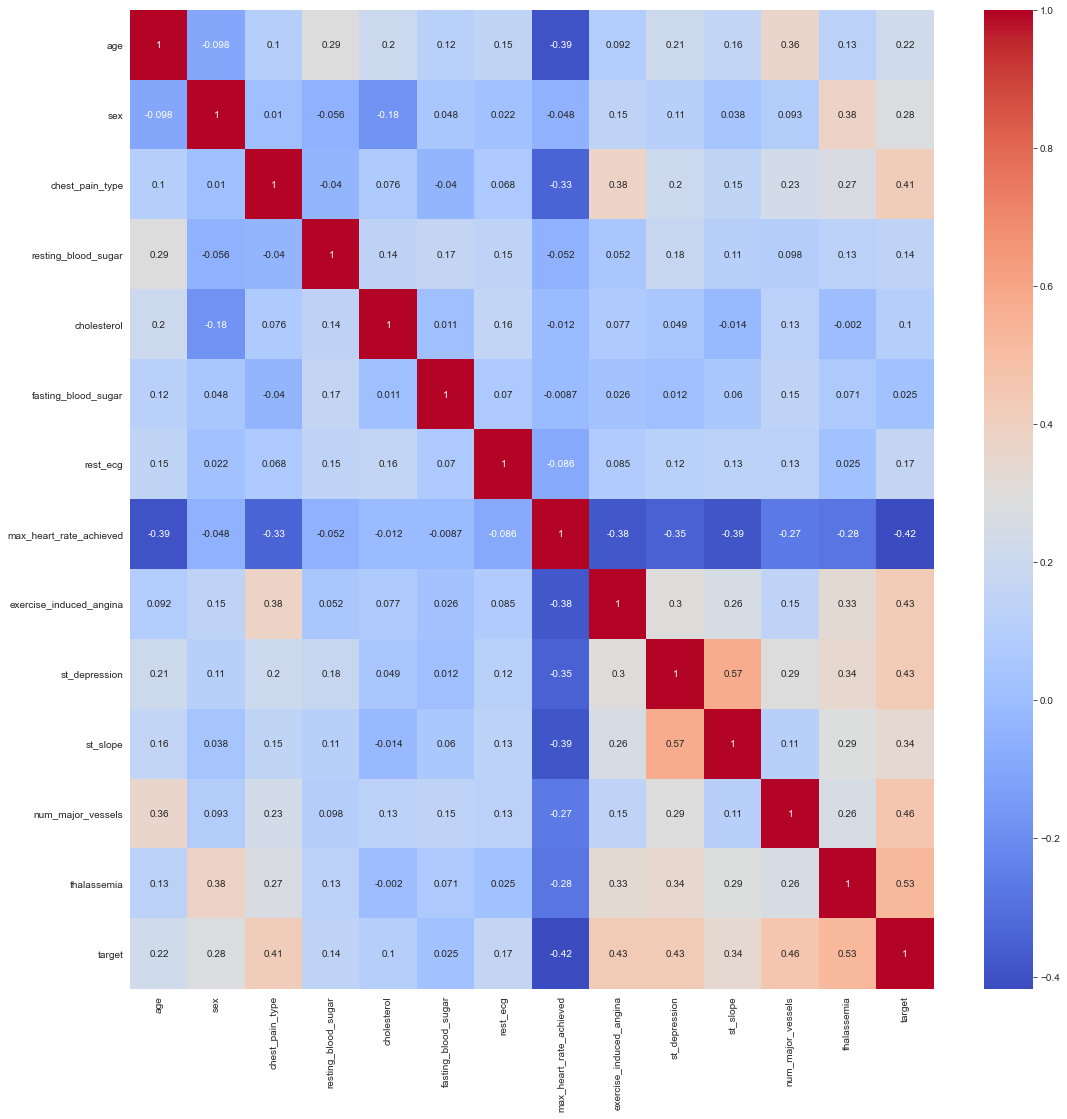

In [115]:
plt.figure(figsize=(18,18))
sns.heatmap(data_copy.corr(),annot=True, cmap = 'coolwarm')

In [116]:
data_copy_t0=data_copy.loc[data_copy["target"]==0]
data_copy_t1=data_copy.loc[data_copy["target"]==1]

# Bivariate-Numerical

Text(0.5, 1.0, 'Max Heart Rate achieved v/s Age \n')

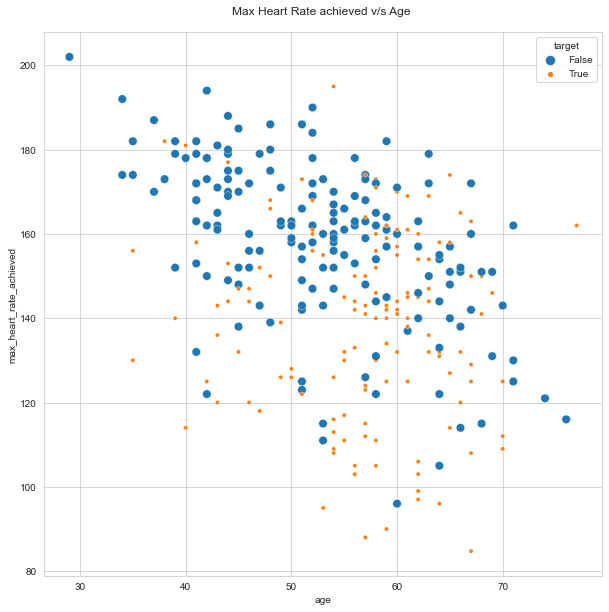

In [117]:
# from heatmap we can see...there is a correlation between age and max_haert_rate_achieved with negative correlation of -0.39
plt.figure(figsize = (10, 10))
sns.scatterplot(x='age', y='max_heart_rate_achieved',hue='target',data=data_copy,size='target')
plt.title("Max Heart Rate achieved v/s Age \n")

Text(0.5, 1.0, 'Resting_blood_sugar v/s Age \n')

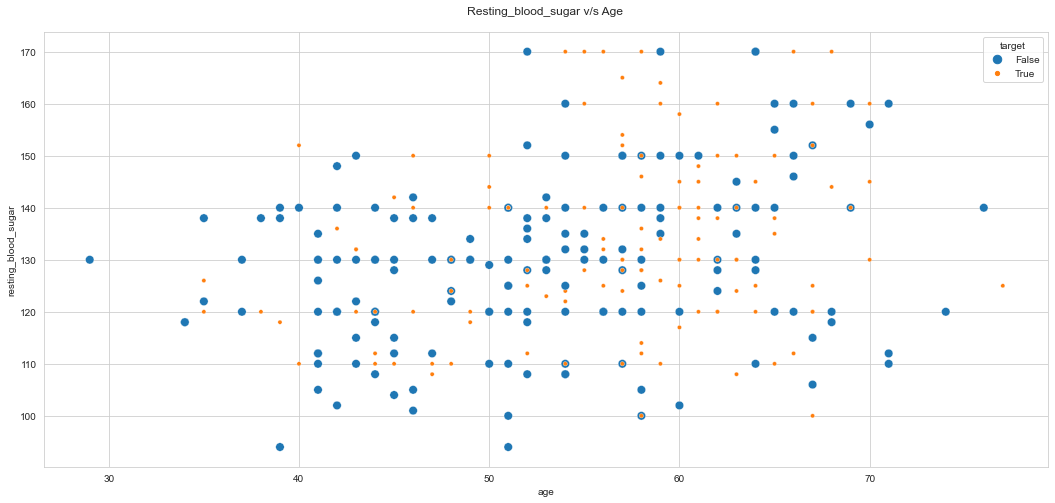

In [118]:
plt.figure(figsize = (18, 8))
sns.scatterplot(x='age', y='resting_blood_sugar',hue='target',data=data_copy,size='target')
plt.title("Resting_blood_sugar v/s Age \n")

Text(0.5, 1.0, 'Cholesterol v/s Age \n')

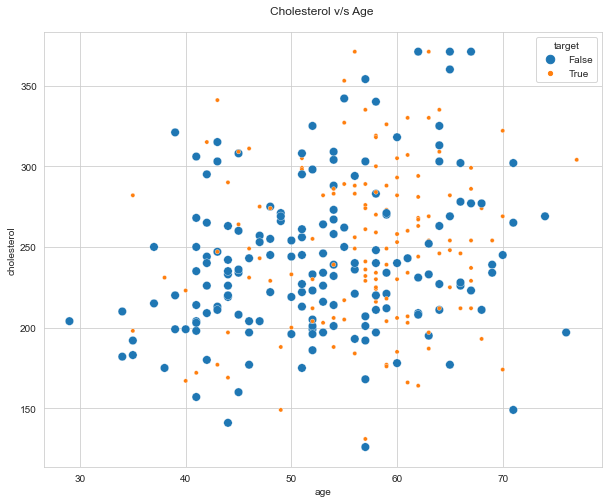

In [119]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x='age', y='cholesterol',hue='target',data=data_copy,size='target')
plt.title("Cholesterol v/s Age \n")

# Bivariate- Categorical

Text(0.5, 1.0, 'Exercise included Angina for Heart Disease')

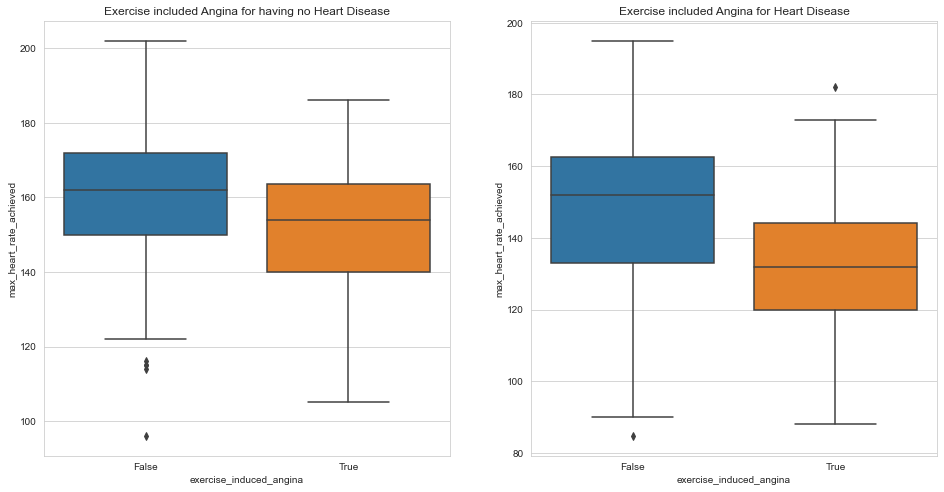

In [120]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,8))
sns.boxplot(data = data_copy_t0, ax=ax1, x='exercise_induced_angina', y='max_heart_rate_achieved')
sns.boxplot(data = data_copy_t1, ax=ax2, x='exercise_induced_angina', y='max_heart_rate_achieved')
ax1.set_title("Exercise included Angina for having no Heart Disease")
ax2.set_title("Exercise included Angina for Heart Disease")

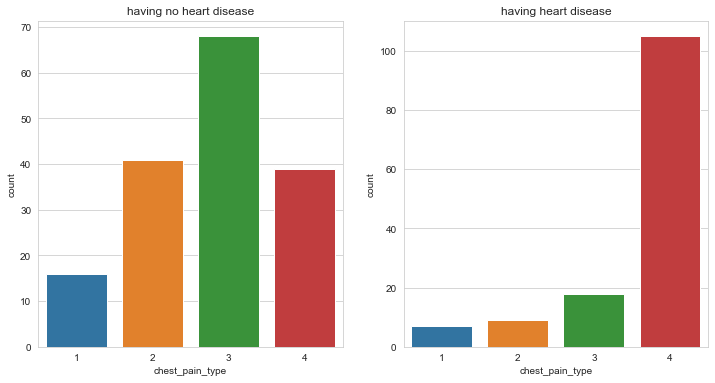

In [121]:
fig, (ax1,ax2)=plt.subplots(1,2, figsize=(12,6))
sns.countplot(x='chest_pain_type',data=data_copy_t0,ax=ax1)
sns.countplot(x='chest_pain_type',data=data_copy_t1,ax=ax2)
ax1.set_xlabel("chest_pain_type");
ax1.set_title("having no heart disease");
ax2.set_title("having heart disease");

Text(0.5, 1.0, 'having heart disease')

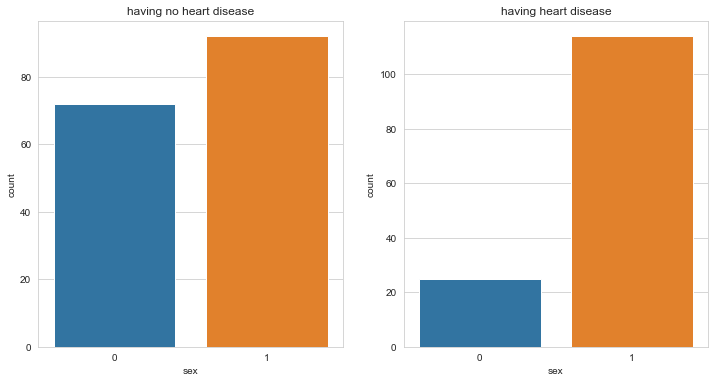

In [122]:
fig, (ax1,ax2)=plt.subplots(1,2, figsize=(12,6))
sns.countplot(x='sex',data=data_copy_t0,ax=ax1)
sns.countplot(x='sex',data=data_copy_t1,ax=ax2)

ax1.set_title("having no heart disease")
ax2.set_title("having heart disease")

Text(0.5, 1.0, 'Chest pain by exercise induced angina')

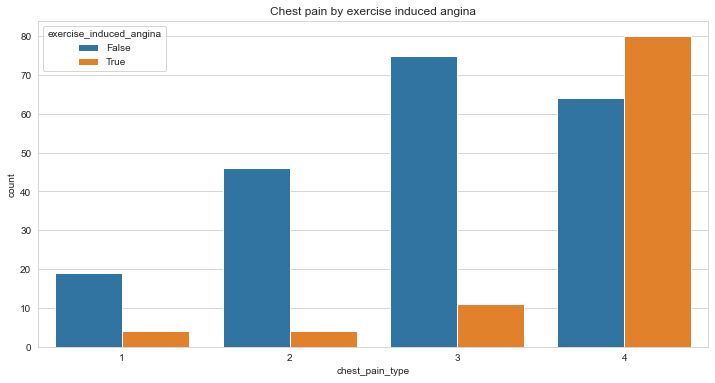

In [123]:
plt.figure(figsize=(12,6))
sns.countplot(x='chest_pain_type',data=data_copy, hue='exercise_induced_angina')
plt.title("Chest pain by exercise induced angina")

# Bivariate-  Numerical-Categorical

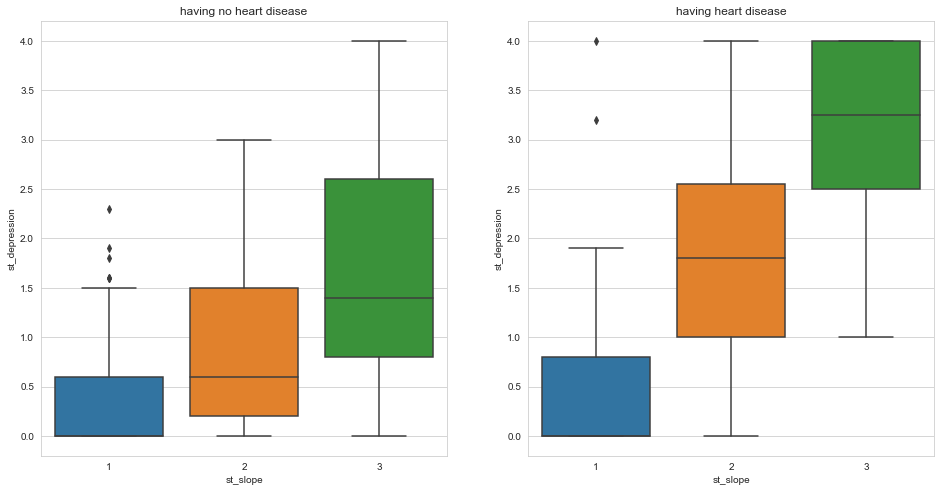

In [124]:
fig, (ax1,ax2)=plt.subplots(1,2, figsize=(16,8))
sns.boxplot(data=data_copy_t0,ax=ax1,x='st_slope',y='st_depression')
sns.boxplot(data=data_copy_t1,ax=ax2,x='st_slope',y='st_depression')
ax1.set_title("having no heart disease");
ax2.set_title("having heart disease");

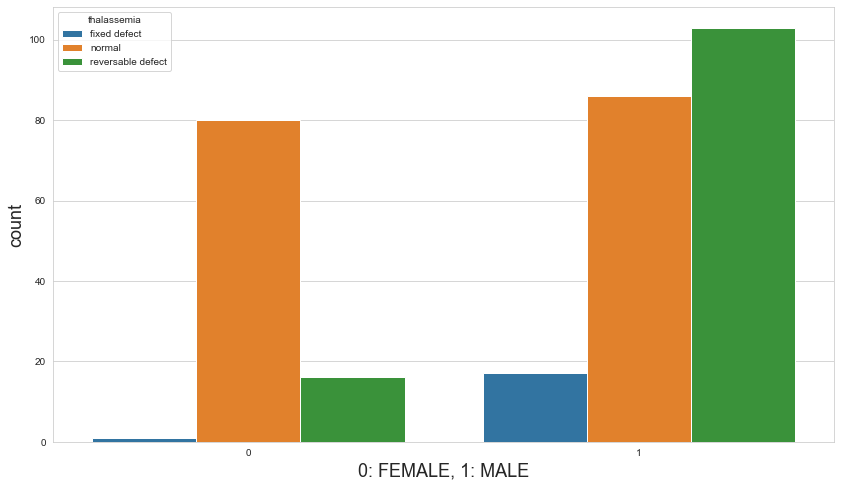

In [126]:
plt.figure(figsize=(14,8))
sns.countplot(x='sex',data=data_copy,hue='thalassemia')
plt.xlabel("0: FEMALE, 1: MALE",fontsize=18)
plt.ylabel("count",fontsize=18)
plt.show()

Text(0.5, 0, 'thalassemia')

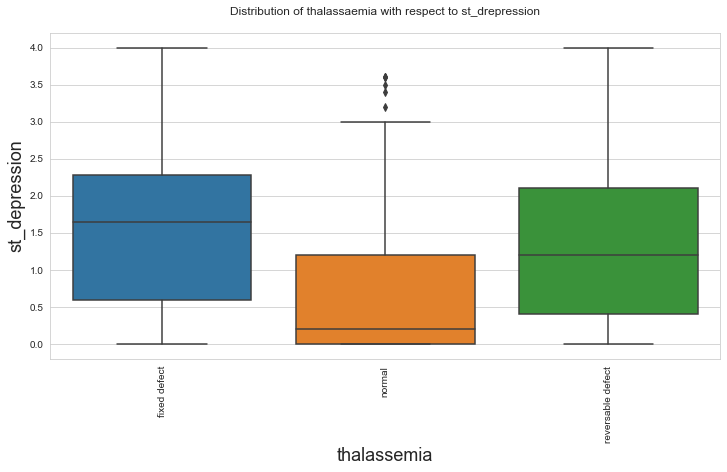

In [127]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90,fontsize=10)
plt.title("Distribution of thalassaemia with respect to st_drepression\n" )
sns.boxplot(x='thalassemia',data=data_copy, y='st_depression')
plt.ylabel("st_depression",fontsize=18)
plt.xlabel("thalassemia",fontsize=18)

Text(0.5, 1.0, 'max_heart_rate_achieved v/s st slope \n \n 1: upsloping, Value 2: flat, Value 3: downsloping \n')

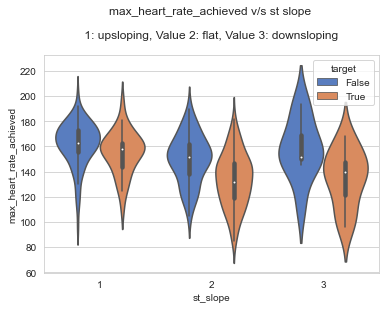

In [128]:
ax = sns.violinplot(x="st_slope", y="max_heart_rate_achieved", hue="target",data=data_copy, palette="muted")
plt.title("max_heart_rate_achieved v/s st slope \n \n 1: upsloping, Value 2: flat, Value 3: downsloping \n")

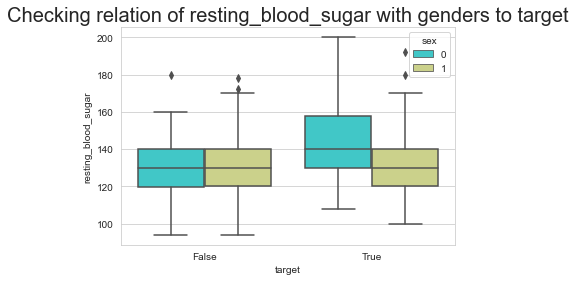

In [129]:
sns.boxplot(x = data_copy['target'], y = data['resting_blood_sugar'], hue = data['sex'], palette = 'rainbow')
plt.title('Checking relation of resting_blood_sugar with genders to target', fontsize = 20, fontweight = 30)
plt.show()

Text(0.5, 1.0, 'Chest Pain Type v/s target \n  (1: typical angina 2: atypical angina,  3: non-anginal pain, 4: asymptomatic)')

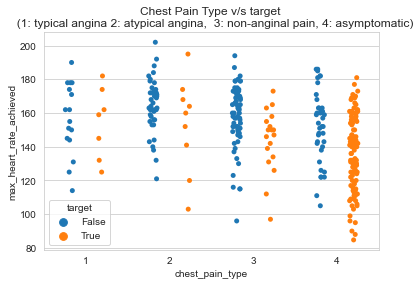

In [130]:
sns.stripplot(x ='chest_pain_type', y ='max_heart_rate_achieved', data=data_copy,jitter = True, hue ='target', dodge = True)
plt.title("Chest Pain Type v/s target \n  (1: typical angina 2: atypical angina,  3: non-anginal pain, 4: asymptomatic)")

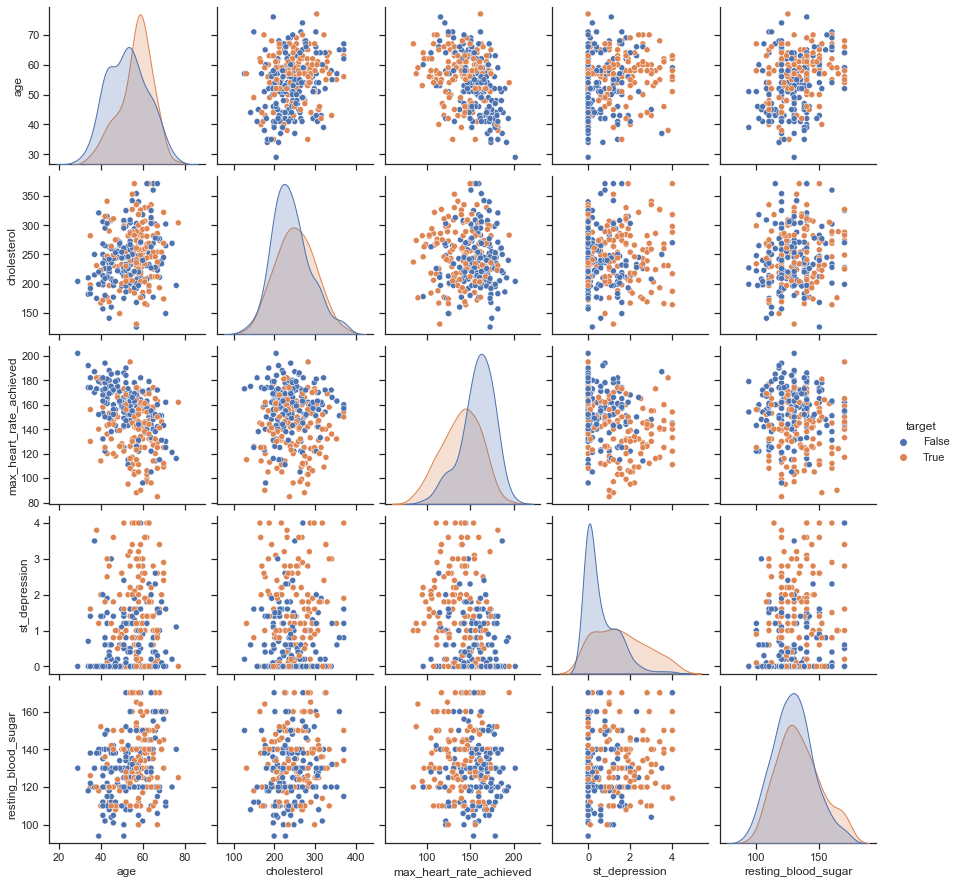

In [131]:
sns.set(style="ticks")
sns.pairplot(data_copy[["age","cholesterol","max_heart_rate_achieved","st_depression","resting_blood_sugar","target"]], hue="target")

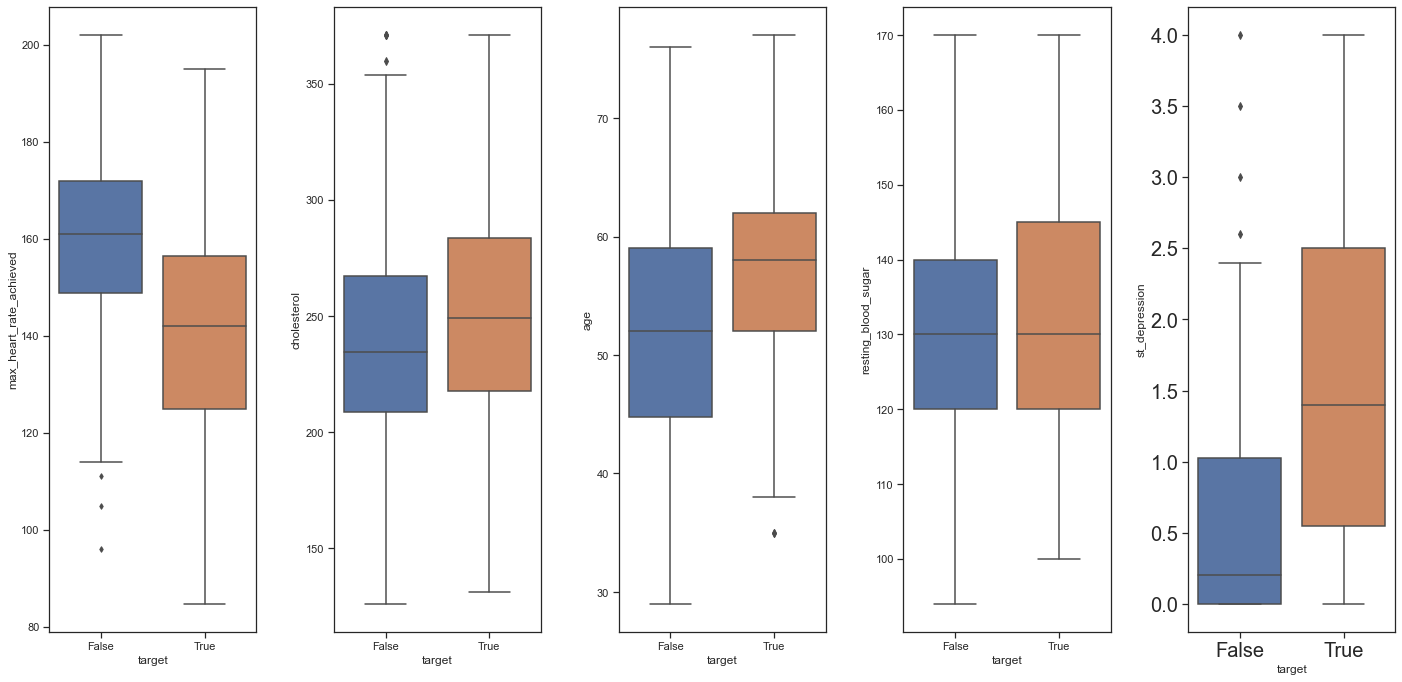

In [132]:
f, axes = plt.subplots(1, 5,figsize=(20,10))
sns.set(font_scale=2)
sns.boxplot(x=data_copy.target, y=data_copy.max_heart_rate_achieved, ax=axes[0],fliersize=4);
sns.boxplot(x=data_copy.target, y=data_copy.cholesterol, ax=axes[1]);
sns.boxplot(x=data_copy.target, y=data_copy.age, ax=axes[2]);
sns.boxplot(x=data_copy.target, y=data_copy.resting_blood_sugar, ax=axes[3]);
sns.boxplot(x=data_copy.target, y=data_copy.st_depression, ax=axes[4]);
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()

1. Heart Disease detected is more likely to be Yes if the Chest Pain type is Asymtomatic than on average.
2. Heart Disease detected is more likely to be Yes when thalassemia is Reversable Defect (which is not normal) than otherwise.
3. On average when number of major vessels increases, the likelihood of Heart disease detected being Yes increases.
4. Heart Disease detected is more likely to be Yes when the age is more than 54 than on average.
5. Resting Blood Sugar >= 130 mm Hg, is what is observed in patients with Heart Disease.
6. Heart Disease detected is more likely to be Yes if ST segment showing Downslope (unhealthy heart).
7. Heart Disease detected is more likely to be Yes for exercise induced Anginal pain.
8. Heart Disease detected is more likely to be Yes for patients having Heart Rate between 140-160.
9. Males have higher chances of having Heart Disease than females.
10. cholesterol - serum cholestoral in mg/dl : above 200 is cause for concern.

In [144]:
data_copy.to_csv("Heart_Disease_Final.csv",index=False)